In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

In [3]:
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [4]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)

In [5]:
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [6]:
data['1950':'1952'] #What do you notice about the range of dates?

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


It only shows the first of each month and it follows a monthly sequence

In [8]:
# What is the empirical range of dates?
min(data.index), max(data.index)

(Timestamp('1950-01-01 00:00:00'), Timestamp('2017-10-01 00:00:00'))

In [ ]:
# How to visualize

we can see them by these two above functions

In [9]:
# What kind of index do we have?
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
data['1951-11-11':'1951-11-12']

,value
month,


In [11]:
# What if we want a period index?
data_pd = data.to_period()

In [12]:
data_pd['1951-11-11':'1951-11-12']

,value
month,
1951-11,-0.068519


In [13]:
data_pd['1951-11-11':'1952-01-12']

,value
month,
1951-11,-0.068519
1951-12,1.987200
1952-01,0.368250


In [ ]:
# Which is more appropriate for this data?

Is a monthly/year time period table, so to_period() fits better for this.

In [16]:
# How do various data loads perform?
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = True, no date parser
1 loop, best of 3: 315 ms per loop
infer_datetime_format = False, no date parser
1 loop, best of 3: 313 ms per loop
infer_datetime_format = True, date parser provided
1 loop, best of 3: 364 ms per loop
infer_datetime_format = False, date parser provided
1 loop, best of 3: 355 ms per loop


In [17]:
# What if you already have the data frame and want to parse columns?
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

,day,hour,month,year
0,4,2,2,2015
1,5,3,3,2016


In [18]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [19]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [ ]:
# Does it work with other column names?

In [20]:
df.columns = ['dy','hr','mth', 'yr']
df.head(1)

,dy,hr,mth,yr
0,4,2,2,2015


yes, it does as we see in the above example

In [38]:
# Go get your own time series data, load it in, and see what you can see
# Hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [39]:
# 1. plot 2. get range of dates 3. convert between time and period index

In [42]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt

ibm = pdr.get_data_yahoo(symbols='IBM', start=datetime(2000, 1, 1), end=datetime(2012, 1, 1))
#print(ibm['Adj Close'])
ibm.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,112.4375,116.0,111.875,116.0000,85.152336,10347700
2000-01-04,114.0000,114.5,110.875,112.0625,82.261917,8227800


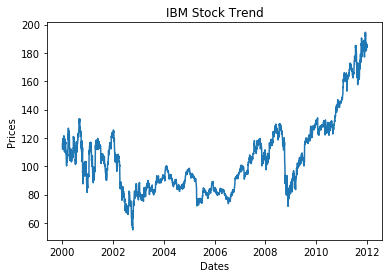

In [49]:
plt.plot(ibm.index, ibm.Close)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('IBM Stock Trend')
plt.show()

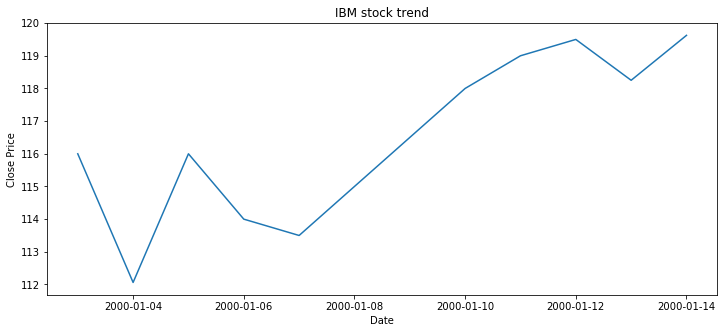

In [45]:
plt.subplots(figsize=(12,5))
plt.plot(ibm.loc['2000-01-03':'2000-01-15'].index,
        ibm.loc['2000-01-03':'2000-01-15']['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IBM stock trend')
plt.show()

In [51]:
ibm.to_period('D').head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,112.4375,116.00,111.875,116.0000,85.152336,10347700
2000-01-04,114.0000,114.50,110.875,112.0625,82.261917,8227800
2000-01-05,112.9375,119.75,112.125,116.0000,85.152336,12733200


In [23]:
# Let's experiment with truncate convenience function
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='10/31/2015', after='12/31/2015')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int32

In [24]:
# You can truncate in a way that breaks frequency
ts[[0, 2, 6]].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

In [26]:
# It will save you when it can
ts.iloc[0:10:2].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2015-11-30', '2016-01-31',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='2M')